In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visualizing Data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diwali-sales/Diwali Sales Data.csv


In [2]:
data = pd.read_csv("/kaggle/input/diwali-sales/Diwali Sales Data.csv", encoding="unicode_escape")

In [3]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.shape

(11251, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
(data.isnull().sum()/len(data))*100 > 30

User_ID             False
Cust_name           False
Product_ID          False
Gender              False
Age Group           False
Age                 False
Marital_Status      False
State               False
Zone                False
Occupation          False
Product_Category    False
Orders              False
Amount              False
Status               True
unnamed1             True
dtype: bool

In [7]:
data.drop(["Status", "unnamed1"], axis=1, inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
#Correcting the Data Type
data[["Amount", "Orders"]] = data[["Amount", "Orders"]].astype(int)

In [10]:
data.sample(6)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
8406,1004217,Noonan,P00312842,F,18-25,19,0,Gujarat,Western,IT Sector,Clothing & Apparel,2,5458
5715,1002489,Kirkland,P00109242,M,36-45,44,1,Gujarat,Western,Media,Electronics & Gadgets,2,8084
10412,1004345,Duhita,P00111842,M,26-35,33,0,Karnataka,Southern,Aviation,Pet Care,3,2869
3868,1005223,Nandita,P00037142,F,55+,80,0,Himachal Pradesh,Northern,Retail,Sports Products,1,10909
7774,1005643,Shreyshi,P00282442,M,36-45,42,0,Rajasthan,Northern,Hospitality,Beauty,4,6164
9888,1003315,Chuck,P00173842,M,26-35,35,0,Uttarakhand,Central,IT Sector,Clothing & Apparel,2,3645


In [11]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
#Renaming the column
data.rename(columns= {'Cust_name':'Customer_name'}, inplace=True)

In [13]:
#Removing unnecessary columns: Product_ID, User_ID,& Age
data = data.drop(["Product_ID", "User_ID", "Age"], axis=1)

In [14]:
data["Age_Group"] = data["Age Group"]

In [15]:
data.sample(7)

,Customer_name,Gender,Age Group,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_Group
7837,Noshiba,F,36-45,0,Himachal Pradesh,Northern,Food Processing,Electronics & Gadgets,1,6126,36-45
8310,Akash,F,26-35,0,Kerala,Southern,Hospitality,Electronics & Gadgets,4,5845,26-35
3856,Pölking,M,18-25,0,Gujarat,Western,Automobile,Sports Products,1,10984,18-25
1831,Trupti,F,26-35,0,Maharashtra,Western,Aviation,Food,2,15723,26-35
5531,Grace,F,36-45,0,Karnataka,Southern,Automobile,Food,4,8137,36-45
3022,Chandni,F,26-35,1,Karnataka,Southern,Chemical,Footwear & Shoes,1,12237,26-35
5921,Neola,M,26-35,1,Karnataka,Southern,Lawyer,Books,1,8010,26-35


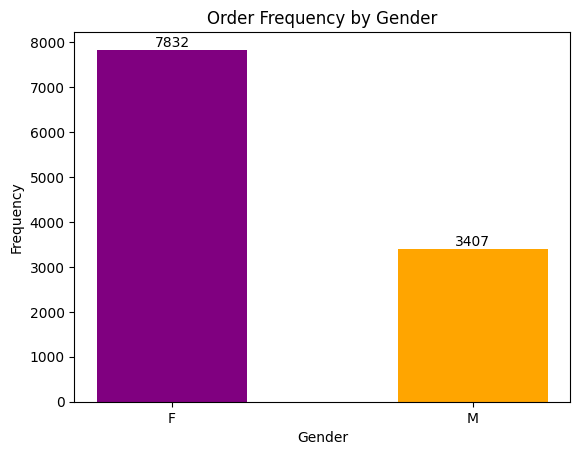

In [16]:
x = data["Gender"].value_counts().index
y = data["Gender"].value_counts().values

bars = plt.bar(x, y, width=0.5, color=["purple", "orange"])

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Order Frequency by Gender")
plt.bar_label(bars)

plt.show()

>  **Analysis:** *The data reveals that the majority of customers are female.*

In [17]:
data["Age Group"].unique()

array(['26-35', '0-17', '18-25', '51-55', '46-50', '55+', '36-45'],
      dtype=object)

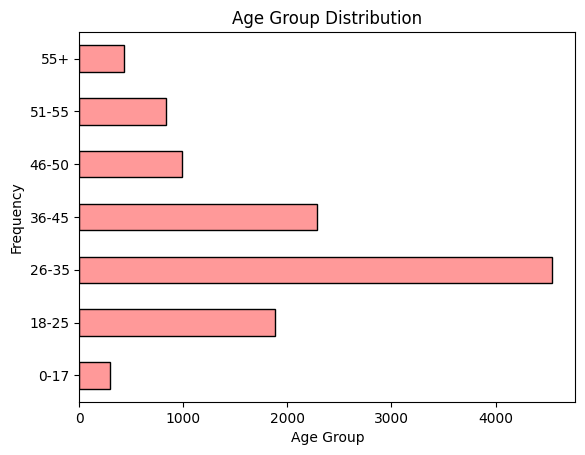

In [18]:
data['Age Group'].value_counts().sort_index().plot(kind='barh', color='#FF9999', edgecolor='black')

plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")

plt.show()

> **Analysis:** *The data indicates that the largest age group consists of individuals aged 26-35, with a notable majority being female.*

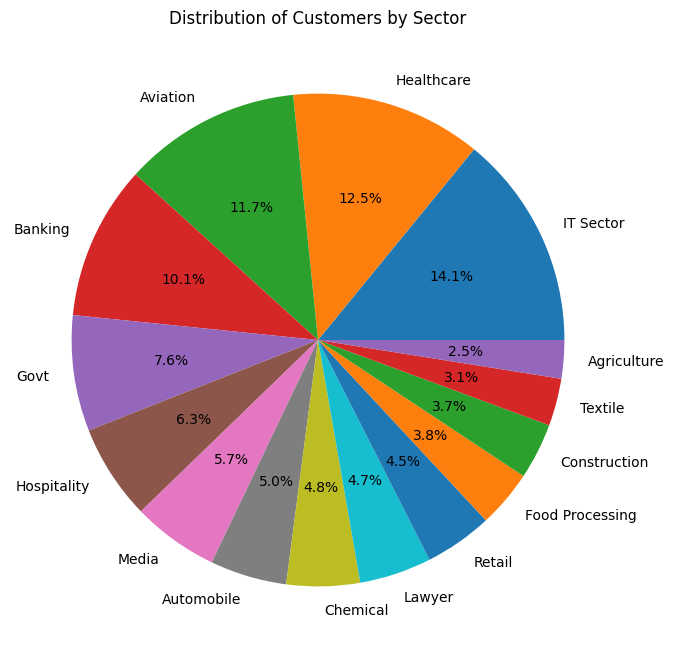

In [19]:
count_sector = data["Occupation"].value_counts()
label_sector = data["Occupation"].value_counts().index

plt.figure(figsize=(9, 8))
plt.pie(count_sector, labels=label_sector, autopct='%1.1f%%' )
plt.title("Distribution of Customers by Sector")

plt.show()

> **Analysis:** *The data indicates that the majority of customers are from the Healthcare sector, followed by the IT sector, and then the Aviation sector.*

In [20]:
data["Product_Category"].unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

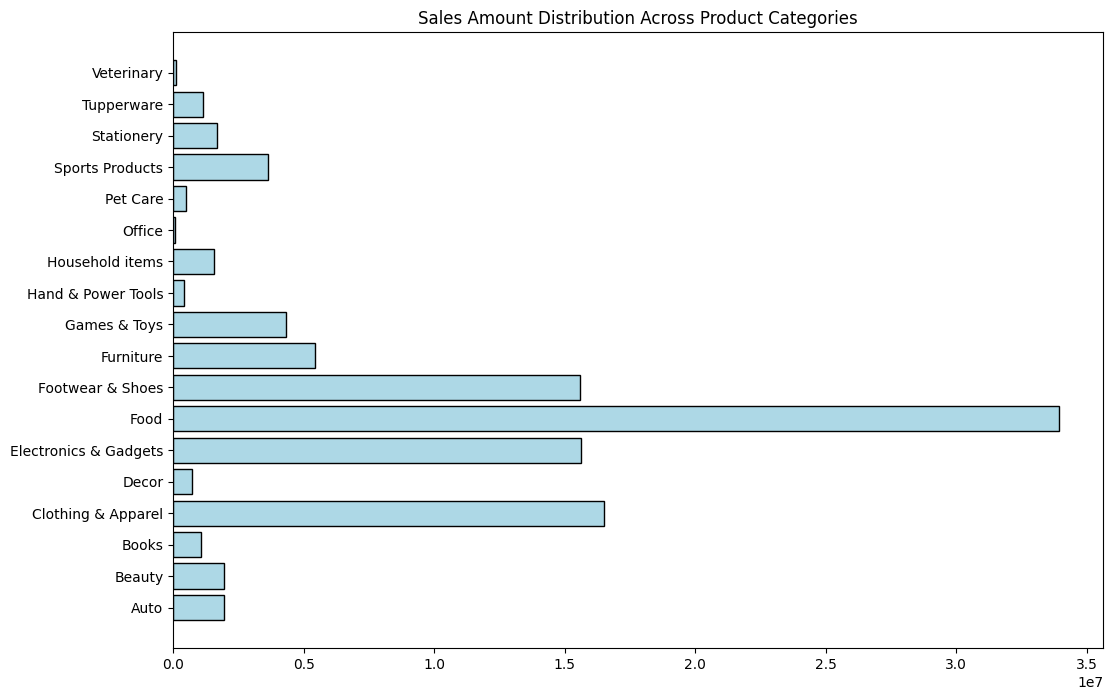

In [21]:
x = data.groupby("Product_Category")["Amount"].sum().index
y = data.groupby("Product_Category")["Amount"].sum()

plt.figure(figsize=(12, 8))
plt.barh(x, y, color='lightblue', edgecolor="black")
plt.title("Sales Amount Distribution Across Product Categories")

plt.show()

> **Analysis:** *The data shows that the highest sales amount is in the Food category.*

> # # **Summary and Strategic Insights**
The final analysis of diwali sales data reveals several key insights. Firstly, individuals aged 26-35 represent the largest segment, with a significant portion being female. Among the Sector-wise distribution, the majority of customers are from the Healthcare sector. In terms of sales performance, the Food category stands out with the highest sales amount.

> **These insights can guide targeted marketing strategies, product offerings, and sector-specific approaches to enhance customer engagement and drive sales.**